                                                                CASE STUDY 04
                                                                    CNN
                                                                --------------
                                                                    
You are given a dataset containing images of 15 types of common vegetables. Your task is to 
create a binary classification model to distinguish between two selected types of vegetables. 
After extracting the data and selecting the two vegetable types, follow these steps:
• Data Preprocessing
• Model Building
• Training
• Evaluation
• Model Optimization
Extension to Multiclass Classification: Once your binary classification model is working well, 
extend it to support multi-class classification. You can progressively add more vegetable types 
to the model.
Real-Time Inference: Test the model with real-time data. Take pictures of vegetables with your 
smartphone or other devices and use the model to classify them. Assess the model's 
performance.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install pillow

In [ ]:
!pip install scipy

In [ ]:
!pip install matplotlib

In [25]:
from keras.preprocessing.image import ImageDataGenerator
import os,cv2
from keras.callbacks import EarlyStopping

In [26]:
train_dir = 'Vegetables/Vegetable Images/train'
test_dir = 'Vegetables/Vegetable Images/test'
validation_dir = 'Vegetables/Vegetable Images/validation'

In [27]:
# DATA PREPROCESSING
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
test_datagen = ImageDataGenerator(
    rescale=1./255,)

In [28]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  
    batch_size=20,
    class_mode='categorical',
    shuffle=False,
)

Found 15000 images belonging to 15 classes.


In [29]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='categorical',
    shuffle=False,
)

Found 3000 images belonging to 15 classes.


In [30]:
# MODEL BUILDING

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(20, (3, 3),strides=1, padding ='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),strides=1, padding ='same',  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(15, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
checkpoint = EarlyStopping(patience=5)

In [34]:
model.fit(
    train_generator,
    steps_per_epoch=15000//20, 
    verbose=1,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=3000//20,
    callbacks = checkpoint
)

Epoch 1/100
750/750 [==============================] - 83s 107ms/step - loss: 2.2759 - accuracy: 0.2241 - val_loss: 1.4865 - val_accuracy: 0.5293
Epoch 2/100
750/750 [==============================] - 75s 100ms/step - loss: 1.3745 - accuracy: 0.5407 - val_loss: 0.9922 - val_accuracy: 0.6797
Epoch 3/100
750/750 [==============================] - 75s 100ms/step - loss: 0.9126 - accuracy: 0.7027 - val_loss: 0.7305 - val_accuracy: 0.7720
Epoch 4/100
750/750 [==============================] - 91s 121ms/step - loss: 0.5634 - accuracy: 0.8177 - val_loss: 0.4723 - val_accuracy: 0.8610
Epoch 5/100
750/750 [==============================] - 85s 113ms/step - loss: 0.3825 - accuracy: 0.8777 - val_loss: 0.4091 - val_accuracy: 0.8730
Epoch 6/100
750/750 [==============================] - 78s 104ms/step - loss: 0.2644 - accuracy: 0.9117 - val_loss: 0.3489 - val_accuracy: 0.9030
Epoch 7/100
750/750 [==============================] - 77s 103ms/step - loss: 0.2087 - accuracy: 0.9351 - val_loss: 0.2972 -

In [35]:
scores = model.evaluate(validation_generator)
print("Validation Accuracy: %.2f%%" % (scores[1] * 100))

150/150 [==============================] - 7s 46ms/step - loss: 0.2861 - accuracy: 0.9397
Validation Accuracy: 93.97%


In [36]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=20,
    class_mode='categorical',
    shuffle=False,
)


Found 3000 images belonging to 15 classes.


In [37]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

150/150 [==============================] - 6s 43ms/step - loss: 0.2496 - accuracy: 0.9403
Test Accuracy: 94.03%


In [38]:
predictions = model.predict(test_generator)

150/150 [==============================] - 6s 42ms/step


In [39]:
from keras.preprocessing import image
import numpy as np

In [40]:
import cv2,os

results = []
wrong_res = {}
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)
    category = test_generator.filenames[i].split('\\')[0]
    img_name = test_generator.filenames[i]
    class_names = os.listdir(test_dir)
    results.append(f"The predicted class for {img_name} is: {class_names[predicted_class]}")
    if category != class_names[predicted_class]:
        wrong_res[img_name]= class_names[predicted_class]

In [41]:
len(results)

3000

In [42]:
print(len(wrong_res))

179


In [45]:
print("\n".join(results))

The predicted class for Bean\0001.jpg is: Bean
The predicted class for Bean\0002.jpg is: Bean
The predicted class for Bean\0003.jpg is: Bean
The predicted class for Bean\0004.jpg is: Bean
The predicted class for Bean\0005.jpg is: Bean
The predicted class for Bean\0006.jpg is: Bean
The predicted class for Bean\0007.jpg is: Bean
The predicted class for Bean\0008.jpg is: Bean
The predicted class for Bean\0009.jpg is: Bean
The predicted class for Bean\0010.jpg is: Bean
The predicted class for Bean\0011.jpg is: Bean
The predicted class for Bean\0012.jpg is: Bean
The predicted class for Bean\0013.jpg is: Bean
The predicted class for Bean\0014.jpg is: Bean
The predicted class for Bean\0015.jpg is: Bean
The predicted class for Bean\0016.jpg is: Bean
The predicted class for Bean\0017.jpg is: Bean
The predicted class for Bean\0018.jpg is: Bean
The predicted class for Bean\0019.jpg is: Bean
The predicted class for Bean\0020.jpg is: Bean
The predicted class for Bean\0021.jpg is: Bean
The predicted

In [46]:
#TESTING WITH A REALTIME IMAGE

In [47]:
import matplotlib.pyplot as plt
def show_image(folder_path):
    # Traverse through a folder with images
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].set_title("Image")
    ax[1].set_title("Prediction")
    img_path = os.listdir(folder_path)
    class_names = os.listdir(test_dir)
    for i,veg_img in enumerate(img_path):
        print(i, veg_img, len(img_path))
        # Load the image
        img_name = os.path.join(folder_path,veg_img)
        img = image.load_img(img_name, target_size=(64, 64))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class of the image
        prediction = model.predict(img_array)
        predicted_class =  np.argmax(prediction)

        # Display the image on the right side of a variable value inside a for loop
        img = cv2.imread(img_name)
        ax[0].imshow(img)
        ax[1].text(0.5, 0.5, class_names[predicted_class], fontsize=20, ha="center")
        if i != len(img_path)-1:
            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            ax[0].set_title("Image")
            ax[1].set_title("Prediction")
        elif i == len(img_path)-1:
            plt.show()

0 download.jpg 5
1/1 [==============================] - 0s 75ms/step
1 OIP (2).jpg 5
1/1 [==============================] - 0s 31ms/step
2 R.jpg 5
1/1 [==============================] - 0s 25ms/step
3 WhatsApp Image 2023-11-09 at 9.47.45 AM.jpeg 5
1/1 [==============================] - 0s 21ms/step
4 WhatsApp Image 2023-11-09 at 9.50.27 AM.jpeg 5
1/1 [==============================] - 0s 21ms/step


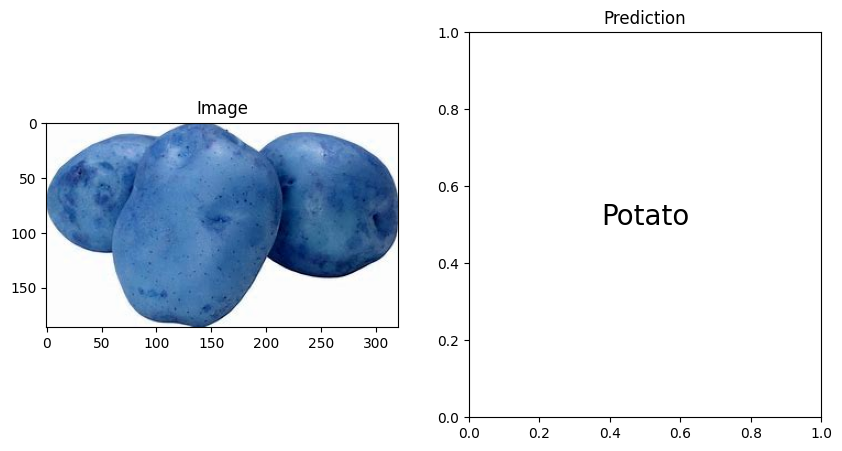

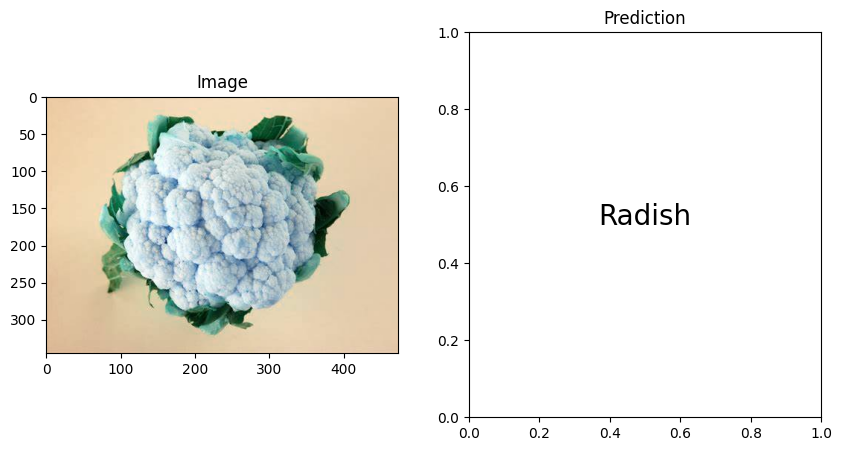

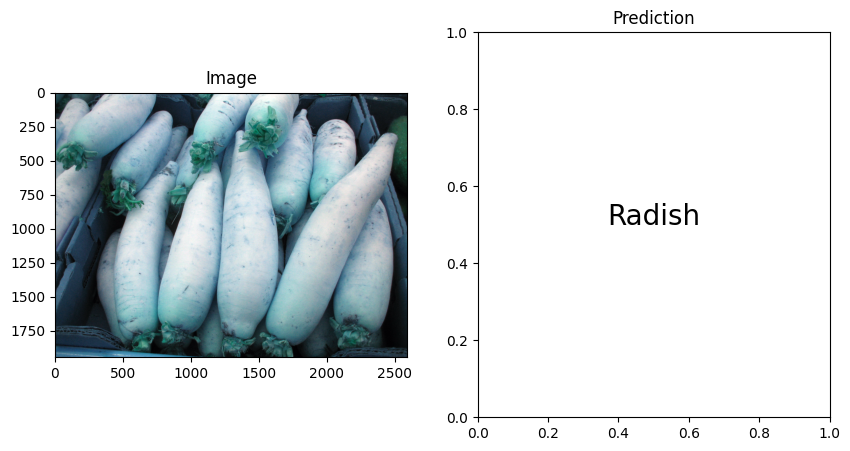

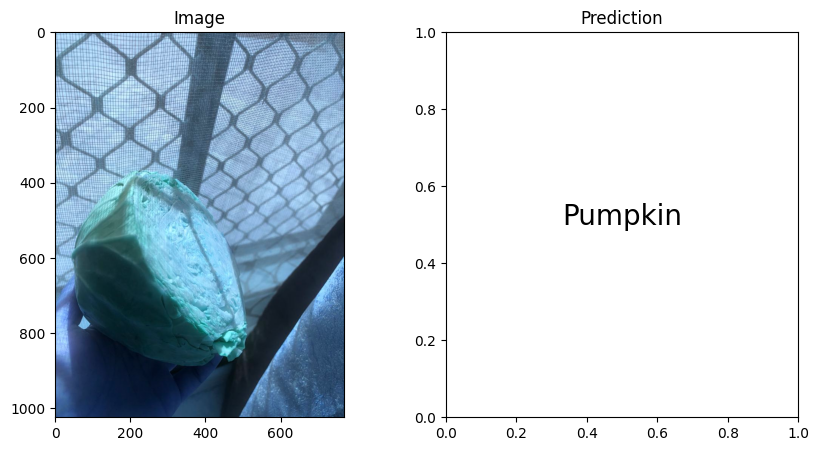

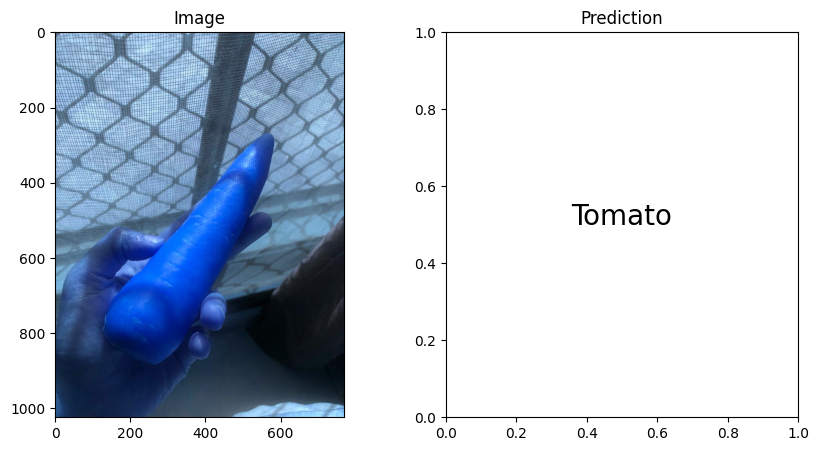

In [48]:
real_img_dir = 'Real Images'
show_image(real_img_dir)